In [2]:
#library
import pandas as pd
#read the csv file
dataset=pd.read_csv("C:/Users/sharm/Desktop/AS/insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# ENCRYPTION
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

def BytesToInt(b):
    return int.from_bytes(b, byteorder='big')

# Load dataset
dataset = pd.read_csv("C:/Users/sharm/Desktop/AS/insurance.csv")

# Choose a column to encrypt (replace 'column_to_encrypt' with the actual column name)
column_to_encrypt = 'bmi'

# Generate a random 256-bit key
key = os.urandom(32)

# Create a cipher object using AES in CBC mode with a random IV
cipher = Cipher(algorithms.AES(key), modes.CFB(os.urandom(16)), backend=default_backend())

# Convert the column to bytes and pad it to be a multiple of 16 bytes (AES block size)
dataset[column_to_encrypt] = dataset[column_to_encrypt].astype(str).apply(lambda x: x.encode('utf-8').ljust(16 * ((len(x) // 16) + 1)))

# Encrypt each value in the column
dataset[column_to_encrypt] = dataset[column_to_encrypt].apply(lambda x: BytesToInt(cipher.encryptor().update(x)))

# Save the key for future decryption
with open('encryption_key.txt', 'wb') as key_file:
    key_file.write(key)

In [4]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,101426883659768847607040692591311843697,0,yes,southwest,16884.92400
1,18,male,102735342936370444029125466646869045617,1,no,southeast,1725.55230
2,28,male,102735343181173086797809416008170860913,3,no,southeast,4449.46200
3,33,male,101411307239597159868583844643069620593,0,no,northwest,21984.47061
4,32,male,101359383872408417126421852083181187441,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,102730150164142934115910910589276123505,3,no,northwest,10600.54830
1334,18,female,102724957868831824337389105436570808689,0,no,northeast,2205.98080
1335,18,female,102761304025141275615589121298244956529,0,no,southeast,1629.83350
1336,21,female,101416499145279940466047969192197353841,0,no,southwest,2007.94500


In [5]:
#region
dataset['region'].value_counts()

In [6]:
# #smoker
dataset['smoker'].value_counts()

In [7]:
#sex
dataset['sex'].value_counts()

In [8]:
#check null values
dataset.isnull().sum()

In [9]:
#detailed info
dataset.info()

In [10]:
#convert categorical to numerical
dataset['sex'] = dataset['sex'].map({'female': 0, 'male': 1})

In [11]:
dataset['smoker'] = dataset['smoker'].map({'no':0,'yes':1})

In [12]:
dataset['region'] = dataset['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})
# print(dataset)

In [13]:
#assigning x & y
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [14]:
#split the dataset into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.2)

In [15]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [19]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

c:\Users\sharm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.022e+10, tolerance: 1.582e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

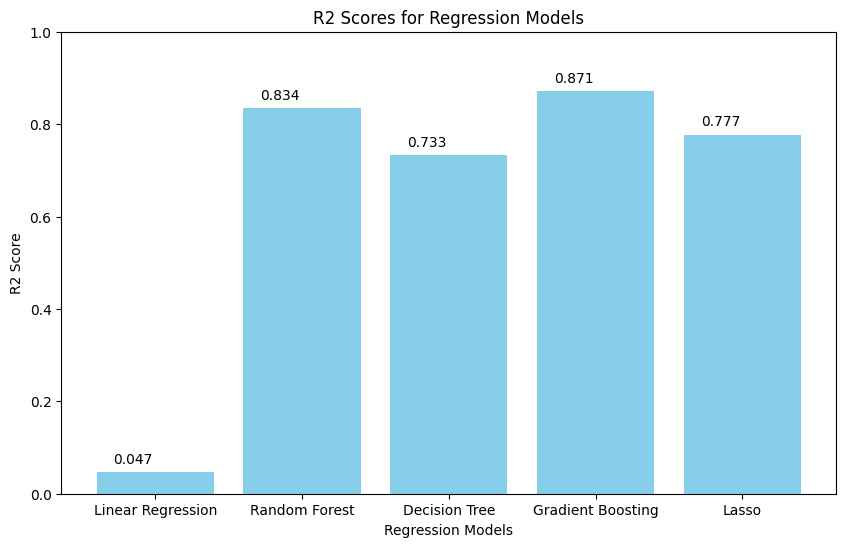

In [20]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

models = [lr, rf, dt, gb, lasso]
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'Lasso']
r2_scores = []

for model in models:
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='skyblue')
plt.title('R2 Scores for Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R2 Score')
plt.ylim(0, 1)  # R2 score ranges from 0 to 1

# Add text annotations on top of each bar
for bar, r2_score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{r2_score:.3f}', ha='center', color='black')

plt.show()


In [24]:
from joblib import dump
dump(rf, './../savedModels/model.joblib')

['./../savedModels/model.joblib']